<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-of-libraries" data-toc-modified-id="Import-of-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import of libraries</a></span></li><li><span><a href="#Human-trafficking-data" data-toc-modified-id="Human-trafficking-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Human trafficking data</a></span><ul class="toc-item"><li><span><a href="#Data-import-&amp;-sneak-peek" data-toc-modified-id="Data-import-&amp;-sneak-peek-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data import &amp; sneak peek</a></span></li><li><span><a href="#&quot;Europeanization&quot;-of-the-data" data-toc-modified-id="&quot;Europeanization&quot;-of-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>"Europeanization" of the data</a></span></li><li><span><a href="#Scrub-of-the-columns" data-toc-modified-id="Scrub-of-the-columns-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Scrub of the columns</a></span></li></ul></li><li><span><a href="#Countries-to-clusters-data" data-toc-modified-id="Countries-to-clusters-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Countries-to-clusters data</a></span><ul class="toc-item"><li><span><a href="#Global-Competitiveness-Index" data-toc-modified-id="Global-Competitiveness-Index-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Global Competitiveness Index<br></a></span></li><li><span><a href="#Corruption-Perceptions-Index" data-toc-modified-id="Corruption-Perceptions-Index-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Corruption Perceptions Index<br></a></span></li><li><span><a href="#Fragile-States-Index" data-toc-modified-id="Fragile-States-Index-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Fragile States Index<br></a></span></li><li><span><a href="#Global-Slavery-Index" data-toc-modified-id="Global-Slavery-Index-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Global Slavery Index<br></a></span></li><li><span><a href="#Migration-Integration-Policy-Index" data-toc-modified-id="Migration-Integration-Policy-Index-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Migration Integration Policy Index<br></a></span></li><li><span><a href="#Country-Statistics" data-toc-modified-id="Country-Statistics-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Country Statistics<br></a></span></li><li><span><a href="#The-merge-of-the-countries'-variables" data-toc-modified-id="The-merge-of-the-countries'-variables-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>The merge of the countries' variables</a></span></li><li><span><a href="#Adding-column-'node_type'-to-countries_var" data-toc-modified-id="Adding-column-'node_type'-to-countries_var-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Adding column 'node_type' to countries_var<br></a></span></li><li><span><a href="#Adding-column-'in_eu'-to-countries_var-(in-EU-=-1,-not-in-EU-=-0)" data-toc-modified-id="Adding-column-'in_eu'-to-countries_var-(in-EU-=-1,-not-in-EU-=-0)-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Adding column 'in_eu' to countries_var (in EU = 1, not in EU = 0)</a></span></li><li><span><a href="#Standardization-of-the-country-data-(StandardScaler)" data-toc-modified-id="Standardization-of-the-country-data-(StandardScaler)-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Standardization of the country data (StandardScaler)</a></span></li><li><span><a href="#Countries-to-clusters:-K-means-Cluster-Analysis" data-toc-modified-id="Countries-to-clusters:-K-means-Cluster-Analysis-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Countries-to-clusters: K-means Cluster Analysis</a></span><ul class="toc-item"><li><span><a href="#Feature-selection-for-optimal-clusterization" data-toc-modified-id="Feature-selection-for-optimal-clusterization-3.11.1"><span class="toc-item-num">3.11.1&nbsp;&nbsp;</span>Feature selection for optimal clusterization</a></span><ul class="toc-item"><li><span><a href="#MIP-index-included-=-better-clusterization?" data-toc-modified-id="MIP-index-included-=-better-clusterization?-3.11.1.1"><span class="toc-item-num">3.11.1.1&nbsp;&nbsp;</span>MIP index included = better clusterization?</a></span></li><li><span><a href="#Country-statistics-excluded-=-better-clusterization?" data-toc-modified-id="Country-statistics-excluded-=-better-clusterization?-3.11.1.2"><span class="toc-item-num">3.11.1.2&nbsp;&nbsp;</span>Country statistics excluded = better clusterization?</a></span></li></ul></li></ul></li><li><span><a href="#Cluster-Profiling" data-toc-modified-id="Cluster-Profiling-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Cluster Profiling</a></span></li><li><span><a href="#Cluster-weights-&amp;-clusters-to-lists" data-toc-modified-id="Cluster-weights-&amp;-clusters-to-lists-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Cluster weights &amp; clusters to lists</a></span></li></ul></li><li><span><a href="#Route-finder" data-toc-modified-id="Route-finder-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Route finder</a></span><ul class="toc-item"><li><span><a href="#Countries-&amp;-borders-data" data-toc-modified-id="Countries-&amp;-borders-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Countries &amp; borders data</a></span></li><li><span><a href="#List-of-all-routes-(origin-to-destination)" data-toc-modified-id="List-of-all-routes-(origin-to-destination)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>List of all routes (origin to destination)</a></span></li><li><span><a href="#Adding-column-'route_type'-to-eur_ht" data-toc-modified-id="Adding-column-'route_type'-to-eur_ht-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Adding column 'route_type' to eur_ht</a></span></li><li><span><a href="#Route-finder" data-toc-modified-id="Route-finder-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Route finder</a></span><ul class="toc-item"><li><span><a href="#Several-attempts-through-trial-and-a-lot-of-errorrrrr" data-toc-modified-id="Several-attempts-through-trial-and-a-lot-of-errorrrrr-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Several attempts through trial and a lot of errorrrrr</a></span></li><li><span><a href="#Generating-the-route-finder:-same-origin,-same-destination" data-toc-modified-id="Generating-the-route-finder:-same-origin,-same-destination-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Generating the route finder: same origin, same destination</a></span></li></ul></li><li><span><a href="#Connect-to-SQL-for-all-permutations:-Recursive-Loops" data-toc-modified-id="Connect-to-SQL-for-all-permutations:-Recursive-Loops-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Connect to SQL for all permutations: Recursive Loops</a></span></li></ul></li><li><span><a href="#Finding-the-route-of-the-least-resistance" data-toc-modified-id="Finding-the-route-of-the-least-resistance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finding the route of the least resistance</a></span><ul class="toc-item"><li><span><a href="#Split-routestrings-and-add-columns-'origin'-and-'destination'" data-toc-modified-id="Split-routestrings-and-add-columns-'origin'-and-'destination'-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Split routestrings and add columns 'origin' and 'destination'</a></span></li><li><span><a href="#Route-calculator:-EU/non-EU-as-'border-weights'" data-toc-modified-id="Route-calculator:-EU/non-EU-as-'border-weights'-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Route calculator: EU/non-EU as 'border weights'</a></span></li></ul></li><li><span><a href="#Export-of-dataframes-for-Tableau" data-toc-modified-id="Export-of-dataframes-for-Tableau-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Export of dataframes for Tableau</a></span><ul class="toc-item"><li><span><a href="#Generating-a-column-'order'-for-mapping-routes-of-least-resistance-in-Tableau" data-toc-modified-id="Generating-a-column-'order'-for-mapping-routes-of-least-resistance-in-Tableau-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Generating a column 'order' for mapping routes of least resistance in Tableau</a></span></li><li><span><a href="#Generating-a-seperate-routes-dataframe-for-example-'BLR'-in-Tableau" data-toc-modified-id="Generating-a-seperate-routes-dataframe-for-example-'BLR'-in-Tableau-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generating a seperate routes dataframe for example 'BLR' in Tableau</a></span></li><li><span><a href="#Generating-a-column-'order'-for-mapping-routes-of-least-resistance-in-Tableau" data-toc-modified-id="Generating-a-column-'order'-for-mapping-routes-of-least-resistance-in-Tableau-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Generating a column 'order' for mapping routes of least resistance in Tableau</a></span></li></ul></li></ul></div>

# UpRouted

## Import of libraries

In [1]:
import getpass
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymysql
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
import time
import warnings
warnings.filterwarnings('ignore')

## Human trafficking data

### Data import & sneak peek

In [2]:
ht = pd.read_csv('/Users/elissadejong/UpRouted/data_files/CTDC_synthetic_20210825.tsv', sep='\t')

In [3]:
ht.head()

,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,...,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
0,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
ht.shape

(193051, 37)

In [5]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193051 entries, 0 to 193050
Data columns (total 37 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   yearOfRegistration                    153740 non-null  float64
 1   gender                                145930 non-null  object 
 2   ageBroad                              102270 non-null  object 
 3   majorityStatusAtExploit               40280 non-null   object 
 4   traffickMonths                        20720 non-null   object 
 5   citizenship                           104600 non-null  object 
 6   CountryOfExploitation                 125690 non-null  object 
 7   meansOfControlDebtBondage             10200 non-null   float64
 8   meansOfControlTakesEarnings           20810 non-null   float64
 9   meansOfControlThreats                 25140 non-null   float64
 10  meansOfControlPsychologicalAbuse      26290 non-null   float64
 11  

- Checking null values:

In [6]:
ht.isna().sum()/len(ht)*100

yearOfRegistration                      20.363013
gender                                  24.408576
ageBroad                                47.024361
majorityStatusAtExploit                 79.135047
traffickMonths                          89.267085
citizenship                             45.817426
CountryOfExploitation                   34.892852
meansOfControlDebtBondage               94.716422
meansOfControlTakesEarnings             89.220465
meansOfControlThreats                   86.977534
meansOfControlPsychologicalAbuse        86.381837
meansOfControlPhysicalAbuse             90.411860
meansOfControlSexualAbuse               95.441619
meansOfControlFalsePromises             90.334160
meansOfControlPsychoactiveSubstances    95.591838
meansOfControlRestrictsMovement         87.309053
meansOfControlRestrictsMedicalCare      95.845657
meansOfControlExcessiveWorkingHours     91.499656
meansOfControlThreatOfLawEnforce        95.312120
meansOfControlWithholdsNecessities      94.001585


- As column #7 to #36 refer to boolean bits, the null values are filled with 0:

In [7]:
ht[ht.columns[7:]] = ht[ht.columns[7:]].fillna(0).astype(int)

- Keeping only the columns with less than 75% of null values:

In [8]:
ht = ht.loc[:, ht.isnull().sum() < 0.75*ht.shape[0]]
ht.shape

(193051, 35)

- Standardizing the column headers:

In [9]:
def standardizing_headers(df):
    cols = []
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_'))
    return cols
   
ht.columns = standardizing_headers(ht)
ht.head()

,yearofregistration,gender,agebroad,citizenship,countryofexploitation,meansofcontroldebtbondage,meansofcontroltakesearnings,meansofcontrolthreats,meansofcontrolpsychologicalabuse,meansofcontrolphysicalabuse,...,typeoflabourdomesticwork,typeoflabourhospitality,typeoflabourother,typeofsexprostitution,typeofsexpornography,typeofsexother,recruiterrelationintimatepartner,recruiterrelationfriend,recruiterrelationfamily,recruiterrelationother
0,2015.0,Male,30--38,UKR,RUS,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
1,2015.0,Male,30--38,UKR,RUS,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,2015.0,Male,30--38,UKR,RUS,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
3,2015.0,Male,30--38,UKR,RUS,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
4,2015.0,Male,30--38,UKR,RUS,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1


### "Europeanization" of the data
- Keeping only rows with 'country of exploitation' AND 'citizenship' of European countries:

In [10]:
iso = pd.read_csv('/Users/elissadejong/UpRouted/data_files/iso_codes.csv')
iso.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [11]:
eur_countries = iso[iso.region == 'Europe']

- Adding the transcontinental European countries as well (Russia is already included):

In [12]:
eur_countries = eur_countries.append(iso[iso.name == 'Azerbaijan'])
eur_countries = eur_countries.append(iso[iso.name == 'Kazakhstan'])
eur_countries = eur_countries.append(iso[iso.name == 'Georgia'])
eur_countries = eur_countries.append(iso[iso.name == 'Turkey'])

In [13]:
len(eur_countries)

55

In [14]:
eur_iso_3 = eur_countries['alpha-3'].tolist()

In [15]:
eur_ht = ht[(ht['citizenship'].isin(eur_iso_3)) & (ht['countryofexploitation'].isin(eur_iso_3))]

In [16]:
eur_ht.shape

(17585, 35)

In [17]:
eur_ht['citizenship'].value_counts()

UKR    9975
BLR    1912
ROU    1804
MDA     977
BGR     894
KAZ     500
RUS     463
ALB     295
SRB     261
HUN     169
SVK     104
PRT      76
POL      60
BIH      45
TUR      38
AZE       8
GEO       4
Name: citizenship, dtype: int64

In [18]:
eur_ht['countryofexploitation'].value_counts()

RUS    8372
POL    1874
TUR     924
UKR     789
SRB     634
ROU     533
DEU     489
BGR     468
ITA     430
BIH     415
KAZ     412
MKD     381
BLR     339
MDA     287
ALB     251
CZE     154
GRC     127
ESP     120
GBR      91
SWE      80
NLD      59
CHE      55
AUT      52
DNK      52
FRA      50
PRT      42
IRL      33
SVK      32
GEO      22
BEL       8
FIN       4
LTU       3
NOR       2
HUN       1
Name: countryofexploitation, dtype: int64

### Scrub of the columns 
- 'year of registration'<br> 
Conversion to integers and dropping the null values:

In [19]:
eur_ht['yearofregistration'] = eur_ht['yearofregistration'].fillna(0).astype(int)

In [20]:
# eur_ht = eur_ht[eur_ht.yearofregistration != 0]

In [21]:
eur_ht['yearofregistration'].value_counts()

0       5044
2005    1439
2006    1318
2017    1120
2007     997
2016     980
2012     844
2015     815
2014     803
2002     673
2013     668
2018     537
2011     532
2019     343
2010     343
2003     337
2004     312
2020     190
2009     150
2008     117
2021      23
Name: yearofregistration, dtype: int64

- 'gender' and 'agebroad' columns<br>
Prettifying the values and replacement of null values with the respective modes:

In [22]:
eur_ht['gender'].value_counts()

Female    8180
Male      5808
Name: gender, dtype: int64

In [23]:
eur_ht['gender'] = eur_ht['gender'].str.replace("Female","F")
eur_ht['gender'] = eur_ht['gender'].str.replace("Male","M")

In [24]:
eur_ht['agebroad'].value_counts()

30--38    3175
18--20    1863
21--23    1859
24--26    1565
39--47    1489
48+       1272
27--29    1168
09--17     706
0--8        94
Name: agebroad, dtype: int64

In [25]:
eur_ht['agebroad'] = eur_ht['agebroad'].str.replace("--","-")
eur_ht['agebroad'] = eur_ht['agebroad'].str.replace("+","-100")

In [26]:
eur_ht.isna().sum()/len(ht)*100

yearofregistration                      0.000000
gender                                  1.863238
agebroad                                2.276082
citizenship                             0.000000
countryofexploitation                   0.000000
meansofcontroldebtbondage               0.000000
meansofcontroltakesearnings             0.000000
meansofcontrolthreats                   0.000000
meansofcontrolpsychologicalabuse        0.000000
meansofcontrolphysicalabuse             0.000000
meansofcontrolsexualabuse               0.000000
meansofcontrolfalsepromises             0.000000
meansofcontrolpsychoactivesubstances    0.000000
meansofcontrolrestrictsmovement         0.000000
meansofcontrolrestrictsmedicalcare      0.000000
meansofcontrolexcessiveworkinghours     0.000000
meansofcontrolthreatoflawenforce        0.000000
meansofcontrolwithholdsnecessities      0.000000
meansofcontrolwithholdsdocuments        0.000000
meansofcontrolother                     0.000000
isforcedlabour      

In [27]:
def fill_null_mode(data, cols):
    for col in cols:
        mode_val = data[col].mode()
        data[col] = data[col].fillna(mode_val[0])
    return data

In [28]:
eur_ht = fill_null_mode(eur_ht, eur_ht[['gender', 'agebroad']])

In [29]:
eur_ht.isna().sum()/len(ht)*100

yearofregistration                      0.0
gender                                  0.0
agebroad                                0.0
citizenship                             0.0
countryofexploitation                   0.0
meansofcontroldebtbondage               0.0
meansofcontroltakesearnings             0.0
meansofcontrolthreats                   0.0
meansofcontrolpsychologicalabuse        0.0
meansofcontrolphysicalabuse             0.0
meansofcontrolsexualabuse               0.0
meansofcontrolfalsepromises             0.0
meansofcontrolpsychoactivesubstances    0.0
meansofcontrolrestrictsmovement         0.0
meansofcontrolrestrictsmedicalcare      0.0
meansofcontrolexcessiveworkinghours     0.0
meansofcontrolthreatoflawenforce        0.0
meansofcontrolwithholdsnecessities      0.0
meansofcontrolwithholdsdocuments        0.0
meansofcontrolother                     0.0
isforcedlabour                          0.0
issexualexploit                         0.0
isotherexploit                  

## Countries-to-clusters data

Due to a certain lack of adequate real data (e.g., on border control measures per country) and many available indices and variables reflecting countries only until about 2017, in combination with the 'yearofregistration' time-span of the human trafficking data, the following mixture of data was chosen for this research in order to cluster countries:<br>
- Global Competitiveness Index 2017-2018 (data for 2016) https://www.weforum.org/reports/the-global-competitiveness-report-2017-2018<br>
- Corruption Perceptions Index 2016 https://www.transparency.org/en/cpi/2020/index/table<br>
- Fragile States Index 2016 https://fragilestatesindex.org<br>
- Global Slavery Index 2018 (data for 2017) https://www.globalslaveryindex.org<br>
- Migration Integration Policy Index (fifth edition; covering 2007-2019) https://www.mipex.eu<br>
- Country Statistics - UNData (data for 2017) https://www.kaggle.com/sudalairajkumar/undata-country-profiles

### Global Competitiveness Index<br>
- Columns to be extracted: 'Series' (country code) & 'Global Competitiveness Index' (index ranging from 1-7 (best))<br>
- Rows to be extracted: countries in list eur_iso_3 

In [30]:
gci = pd.read_excel('/Users/elissadejong/UpRouted/data_files/countries_to_clusters_data/global_competitiveness_index_2017.xlsm')

In [31]:
gci.head()

,Series,"1.01 Property rights, 1-7 (best)","1.02 Intellectual property protection, 1-7 (best)",1. Property rights,"1.03 Diversion of public funds, 1-7 (best)","1.04 Public trust in politicians, 1-7 (best)","1.05 Irregular payments and bribes, 1-7 (best)",2. Ethics and corruption,"1.06 Judicial independence, 1-7 (best)","1.07 Favoritism in decisions of government officials, 1-7 (best)",...,"12.01 Capacity for innovation, 1-7 (best)","12.02 Quality of scientific research institutions, 1-7 (best)","12.03 Company spending on R&D, 1-7 (best)","12.04 University-industry collaboration in R&D, 1-7 (best)","12.05 Gov’t procurement of advanced tech products, 1-7 (best)","12.06 Availability of scientists and engineers, 1-7 (best)","12.07 PCT patents, applications/million pop.*",12th pillar: Innovation,Innovation and sophistication factors,Global Competitiveness Index
0,Series unindented,"Property rights, 1-7 (best)","Intellectual property protection, 1-7 (best)",1. Property rights,"Diversion of public funds, 1-7 (best)","Public trust in politicians, 1-7 (best)","Irregular payments and bribes, 1-7 (best)",2. Ethics and corruption,"Judicial independence, 1-7 (best)",Favoritism in decisions of government official...,...,"Capacity for innovation, 1-7 (best)","Quality of scientific research institutions, 1...","Company spending on R&D, 1-7 (best)","University-industry collaboration in R&D, 1-7 ...","Gov’t procurement of advanced tech products, 1...","Availability of scientists and engineers, 1-7 ...","PCT patents, applications/million pop.*",12th pillar: Innovation,Innovation and sophistication factors,Global Competitiveness Index
1,Attribute,Value,Value,Value,Value,Value,Value,Value,Value,Value,...,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
2,ALB,3.707337,3.385709,3.600127,3.090982,3.266395,3.915789,3.424389,2.600933,2.944446,...,4.40533,2.841726,3.4239,3.427884,3.8986,3.280881,0.754434,3.199174,3.550606,4.184991
3,DZA,3.813971,3.67676,3.768234,3.190191,2.824241,3.37516,3.129864,3.512022,3.143458,...,3.627533,3.305939,2.908346,2.621478,3.014823,3.735321,0.177153,2.940951,3.12887,4.0655
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
gci = gci.iloc[:, [0,157]]

In [33]:
gci.columns

Index(['Series', 'Global Competitiveness Index'], dtype='object')

In [34]:
gci_eur = gci[(gci['Series'].isin(eur_iso_3))]

In [35]:
gci_eur

,Series,Global Competitiveness Index
2,ALB,4.184991
8,AUT,5.246649
9,AZE,4.690256
13,BEL,5.225063
18,BIH,3.868728
22,BGR,4.463194
36,HRV,4.190616
38,CZE,4.77447
39,DNK,5.390741
44,EST,4.849882


### Corruption Perceptions Index<br>
- Columns to be extracted: 'ISO3' (country code) & 'CPI score' (index ranging from 0-100 (best))<br>
- Rows to be extracted: 'year' = '2016' and countries in list eur_iso_3

In [36]:
cpi = pd.read_excel('/Users/elissadejong/UpRouted/data_files/countries_to_clusters_data/corruption_perceptions_index_2012_2019.xlsx')

In [37]:
cpi.columns

Index(['Country', 'ISO3', 'Region', 'Year', 'CPI score', 'Rank', 'Sources',
       'Standard e'],
      dtype='object')

In [38]:
cpi = cpi.iloc[:, [1,3,4]]

In [39]:
cpi_16 = cpi[(cpi['Year'] == 2016)]

In [40]:
cpi_eur = cpi_16[(cpi_16['ISO3'].isin(eur_iso_3))]

In [41]:
cpi_eur = cpi_eur.iloc[:, [0,2]]

In [42]:
cpi_eur

,ISO3,CPI score
11,DNK,90.0
19,FIN,89.0
27,CHE,86.0
43,SWE,88.0
51,NOR,85.0
59,NLD,83.0
67,LUX,81.0
75,DEU,81.0
83,ISL,78.0
99,GBR,81.0


### Fragile States Index<br>
- Columns to be extracted: 'Country' & 'Total' (index ranging from 0-... (the lower the better))<br>
- Convert country name to iso3-code<br>
- Rows to be extracted: countries in list eur_iso_3

In [43]:
fsi = pd.read_excel('/Users/elissadejong/UpRouted/data_files/countries_to_clusters_data/fragile_state_index_2016.xlsx')

In [44]:
fsi.columns

Index(['Country', 'Year', 'Rank', 'Total', 'C1: Security Apparatus',
       'C2: Factionalized Elites', 'C3: Group Grievance', 'E1: Economy',
       'E2: Economic Inequality', 'E3: Human Flight and Brain Drain',
       'P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights',
       'S1: Demographic Pressures', 'S2: Refugees and IDPs',
       'X1: External Intervention'],
      dtype='object')

In [45]:
fsi = fsi.iloc[:, [0,3]]

In [46]:
def convert_country_to_iso3(column):
    iso3 = []
    for i in column:
        try:
            iso3.append(iso.loc[iso['name'] == i]['alpha-3'].item())
        except: 
            iso3.append(i)
    return iso3

In [47]:
fsi['Country'] = convert_country_to_iso3(fsi['Country'])

In [48]:
fsi

,Country,Total
0,SOM,114.0
1,SSD,113.8
2,CAF,112.1
3,SDN,111.5
4,YEM,111.5
...,...,...
173,CHE,21.8
174,DNK,21.5
175,NZL,21.3
176,NOR,21.2


In [49]:
for i in fsi['Country']:
    if len(i) > 3:
        print(i)

Syria
Congo Democratic Republic
Guinea Bissau
Cote d'Ivoire
North Korea
Congo Republic
Swaziland
Iran
Laos
Tanzania
Venezuela
Kyrgyz Republic
Russia
Israel and West Bank
Bolivia
Micronesia
Moldova
Cape Verde
Vietnam
Macedonia
Slovak Republic
Czech Republic
South Korea
United States
United Kingdom


- Manually converting the European countries' names that are spelled differently: 

In [50]:
for i in fsi['Country']:
    if 'Russia' in i:
        fsi['Country'] = fsi['Country'].str.replace('Russia', 'RUS')
    elif 'Moldova' in i:
        fsi['Country'] = fsi['Country'].str.replace('Moldova', 'MDA')
    elif 'Macedonia' in i: 
        fsi['Country'] = fsi['Country'].str.replace('Macedonia', 'MKD')
    elif 'Slovak Republic' in i: 
        fsi['Country'] = fsi['Country'].str.replace('Slovak Republic', 'SVK')
    elif 'Czech Republic' in i: 
        fsi['Country'] = fsi['Country'].str.replace('Czech Republic', 'CZE')
    elif 'United Kingdom' in i: 
        fsi['Country'] = fsi['Country'].str.replace('United Kingdom', 'GBR')

In [51]:
fsi_eur = fsi[(fsi['Country'].isin(eur_iso_3))]

### Global Slavery Index<br>
- Columns to be extracted: 'Country', 'Est. prevalence of population in modern slavery (victims per 1,000 population)', 'Final overall (normalised, weighted) vulnerability score' (the lower the better) & 'TOTAL' (government response, the higher the better)
- Convert country name to iso3-code
- Rows to be extracted: countries in list eur_iso_3

In [52]:
gsi = pd.read_excel('/Users/elissadejong/UpRouted/data_files/countries_to_clusters_data/global_slavery_index_2018.xlsx')

In [53]:
gsi.columns

Index(['Country ',
       'Population \n(from United Nations Population Division, World Population Prospects)',
       'Region',
       'Est. prevalence of population in modern slavery (victims per 1,000 population)',
       'Est. number of people in modern slavery',
       'Factor One Governance Issues ', 'Factor Two Nourishment and Access ',
       'Factor Three Inequality', 'Factor Four Disenfranchised Groups',
       'Factor Five Effects of Conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'Criminal justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating'],
      dtype='object')

In [54]:
gsi = gsi.iloc[:, [0,3,10,25]]

In [55]:
gsi['Country '] = convert_country_to_iso3(gsi['Country '])

In [56]:
for i in gsi['Country ']:
    if len(i) > 3:
        print(i)

Korea, Democratic People's Republic of
Iran, Islamic Republic of
Swaziland
Macedonia, the former Yugoslav Republic of
Venezuela, Bolivarian Republic of
Cape Verde
Kosovo
Czech Republic
Bolivia, Plurinational State of
United Kingdom
Hong Kong, China
United States
Taiwan, China


- Manually converting the European countries' names that are spelled differently (Kosovo is not included as it does not appear in the human trafficking data, nor in the iso data (no political stance can be drawn from this choice)):  

In [57]:
for i in gsi['Country ']:
    if 'Macedonia, the former Yugoslav Republic of' in i:
        gsi['Country '] = gsi['Country '].str.replace('Macedonia, the former Yugoslav Republic of', 'MKD')
    elif 'Czech Republic' in i: 
        gsi['Country '] = gsi['Country '].str.replace('Czech Republic', 'CZE')
    elif 'United Kingdom' in i: 
        gsi['Country '] = gsi['Country '].str.replace('United Kingdom', 'GBR')

In [58]:
gsi_eur = gsi[(gsi['Country '].isin(eur_iso_3))]

###  Migration Integration Policy Index<br>
- Columns to be extracted: 'Country' & 'MIPI' (index ranging from 0-100 (best))<br>
- Convert country name to iso3-code<br>
- Rows to be extracted: countries in list eur_iso_3

In [59]:
mipi = pd.read_excel('/Users/elissadejong/UpRouted/data_files/countries_to_clusters_data/migration_integration_policy_index_2020-pages-15-16.xlsx')

In [60]:
mipi.columns

Index(['Country', 'MIPI'], dtype='object')

In [61]:
mipi['Country'] = convert_country_to_iso3(mipi['Country'])

In [62]:
for i in mipi['Country']:
    if len(i) > 3:
        print(i)

Korea
United Kingdom
Moldova
Russia


- Manually converting the European countries' names that are spelled differently:

In [63]:
for i in mipi['Country']:
    if 'Russia' in i:
        mipi['Country'] = mipi['Country'].str.replace('Russia', 'RUS')
    elif 'Moldova' in i:
        mipi['Country'] = mipi['Country'].str.replace('Moldova', 'MDA')
    elif 'United Kingdom' in i: 
        mipi['Country'] = mipi['Country'].str.replace('United Kingdom', 'GBR')

In [64]:
mipi_eur = mipi[(mipi['Country'].isin(eur_iso_3))]

### Country Statistics<br>
- Columns to be extracted:<br>
- 'country'<br>
- 'Surface area (km2)'<br>
- 'Population in thousands (2017)'<br>
- 'Population density (per km2, 2017)'<br>
- 'Sex ratio (m per 100 f, 2017)'<br>
- 'Employment: Agriculture (% of employed)'<br>
- 'Employment: Industry (% of employed)'<br>
- 'Employment: Services (% of employed)'<br>
- 'Unemployment (% of labour force)'<br>
- 'Labour force participation (female/male pop. %)'<br>
- 'International migrant stock (000/% of total pop.)'<br>
- 'Refugees and others of concern to UNHCR (in thousands)'<br>
<br>
- Rows to be extracted: countries in list eur_iso_3<br>

In [65]:
stats = pd.read_csv('/Users/elissadejong/UpRouted/data_files/countries_to_clusters_data/country_profile_variables.csv')

In [66]:
stats.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, curren

In [67]:
stats = stats.iloc[:, [0,2,3,4,12,13,14,15,16,29,30]]

In [68]:
stats['country'] = convert_country_to_iso3(stats['country'])

In [69]:
for i in stats['country']:
    if len(i) > 3:
        print(i)

British Virgin Islands
Channel Islands
China, Hong Kong SAR
China, Macao SAR
Democratic People's Republic of Korea
Democratic Republic of the Congo
Republic of Korea
Republic of Moldova
Saint Helena
State of Palestine
Swaziland
The former Yugoslav Republic of Macedonia
United Kingdom
United Republic of Tanzania
United States Virgin Islands
Wallis and Futuna Islands


- Manually converting the European countries' names that are spelled differently:

In [70]:
for i in stats['country']:
    if 'Republic of Moldova' in i:
        stats['country'] = stats['country'].str.replace('Republic of Moldova', 'MDA')
    elif 'The former Yugoslav Republic of Macedonia' in i: 
        stats['country'] = stats['country'].str.replace('The former Yugoslav Republic of Macedonia', 'MKD')
    elif 'United Kingdom' in i: 
        stats['country'] = stats['country'].str.replace('United Kingdom', 'GBR')

In [71]:
stats_eur = stats[(stats['country'].isin(eur_iso_3))]

### The merge of the countries' variables

- Doing the merge in steps to make sure all separate joins output the right results:

In [72]:
countries_var = eur_countries['alpha-3']

In [73]:
countries_var = countries_var.to_frame()

In [74]:
countries_var = countries_var.merge(gci_eur, how='outer', left_on='alpha-3', right_on='Series')

In [75]:
countries_var = countries_var.merge(cpi_eur, how='outer', left_on='alpha-3', right_on='ISO3')

In [76]:
countries_var = countries_var.merge(fsi_eur, how='outer', left_on='alpha-3', right_on='Country')

In [77]:
countries_var = countries_var.merge(gsi_eur, how='outer', left_on='alpha-3', right_on='Country ')

In [78]:
countries_var = countries_var.merge(mipi_eur, how='outer', left_on='alpha-3', right_on='Country')

In [79]:
countries_var = countries_var.merge(stats_eur, how='outer', left_on='alpha-3', right_on='country')

- Checking null vallues:

In [80]:
null_data = countries_var[countries_var.isnull().any(axis=1)]

In [81]:
null_data

,alpha-3,Series,Global Competitiveness Index,ISO3,CPI score,Country_x,Total,Country,"Est. prevalence of population in modern slavery (victims per 1,000 population)","Final overall (normalised, weighted) vulnerability score",...,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands)
0,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,468,77.0,163.8,-99,-99,-99,-99,-99,42.1/59.7,-99
4,BLR,NaN,NaN,BLR,40.0,BLR,73.9,BLR,10.877024,47.275634,...,207600,9468.0,46.7,9.6,32.0,58.4,0.5,54.0/67.8,1082.9/11.4,7.9
6,BIH,BIH,3.868728,BIH,39.0,BIH,74.6,BIH,3.422194,46.356698,...,51209,3507.0,68.8,18.0,30.4,51.7,25.4,34.3/57.5,34.8/0.9,157.6
12,FRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1393,49.0,35.3,...,...,...,4.0,79.4/86.0,5.5/11.4,-99
16,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,35.0,3457.1,-99,-99,-99,-99,.../...,11.1/34.3,-99
18,GGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,VAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,~0,1.0,1800.0,-99,-99,-99,-99,-99,0.8/100.0,-99
23,IMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,572,84.0,147.9,...,...,...,2.6,57.5/69.3,45.2/51.5,-99
25,JEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping rows that have epistemological limitations (and also do not appear in the human trafficking data), namely:<br>
- ALA<br>
- AND<br>
- FRO<br>
- GIB<br>
- GGY<br>
- VAT<br>
- IMN<br>
- JEY<br>
- LIE<br>
- MCO<br>
- SMR<br>
- SJM<br>

In [82]:
countries_var = countries_var.drop(labels=[0,2,12,16,18,19,23,25,27,32,41,46], axis=0)

- Dropping all but one column storing the countries' iso_3_codes & prettifying the column headers of the "final" dataframe:

In [83]:
countries_var.columns

Index(['alpha-3', 'Series', 'Global Competitiveness Index', 'ISO3',
       'CPI score', 'Country_x', 'Total', 'Country ',
       'Est. prevalence of population in modern slavery (victims per 1,000 population)',
       'Final overall (normalised, weighted) vulnerability score', 'TOTAL',
       'Country_y', 'MIPI', 'country', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'International migrant stock (000/% of total pop.)',
       'Refugees and others of concern to UNHCR (in thousands)'],
      dtype='object')

In [84]:
countries_var = countries_var.drop(['Series', 'ISO3', 'Country_x', 'Country ', 'Country_y', 'country'], axis=1)

In [85]:
countries_var.rename({'alpha-3': 'country_iso', 'Global Competitiveness Index': 'gci_index', 'CPI score': 'cp_index', 'Total': 'fs_index', 'Est. prevalence of population in modern slavery (victims per 1,000 population)': 'modslave_per_1000', 'Final overall (normalised, weighted) vulnerability score': 'vul_modslave', 'TOTAL': 'gov_response_modslave', 'MIPI': 'mip_index'}, axis=1, inplace=True)

In [86]:
countries_var.rename({'Surface area (km2)': 'surface_area', 'Population in thousands (2017)': 'population_1000', 'Population density (per km2, 2017)': 'population_dense'}, axis=1, inplace=True)

In [87]:
countries_var.rename({'Employment: Agriculture (% of employed)': 'employed_agriculture', 'Employment: Industry (% of employed)': 'employed_industry', 'Employment: Services (% of employed)': 'employed_services', 'Unemployment (% of labour force)': 'unemployed', 'Labour force participation (female/male pop. %)': 'labour_part_f_m'}, axis=1, inplace=True)

In [88]:
countries_var.rename({'International migrant stock (000/% of total pop.)': 'migrant_stock_1000_percpop', 'Refugees and others of concern to UNHCR (in thousands)': 'ref_ooc_1000'}, axis=1, inplace=True)

In [89]:
countries_var.columns

Index(['country_iso', 'gci_index', 'cp_index', 'fs_index', 'modslave_per_1000',
       'vul_modslave', 'gov_response_modslave', 'mip_index', 'surface_area',
       'population_1000', 'population_dense', 'employed_agriculture',
       'employed_industry', 'employed_services', 'unemployed',
       'labour_part_f_m', 'migrant_stock_1000_percpop', 'ref_ooc_1000'],
      dtype='object')

Dealing with the remaining null values:<br>
- dropping the row with MLT (Malta), as it does not appear in the human trafficking data anyways<br>
- as MKD (Macedonia) was not included in the used version of the Global Competitiveness Index, the missing value for the gci_index for MKD will be filled with its index for 2018 (rescaled, as that index value is 56.6/100)<br>
- as BLR (Belarus) was not included in any version of the Global Competitiveness Index, the missing value for the gci_index for BLR will be filled with the mean<br>
- the missing values for the mip_index will not be filled at this point. Hence, for the initial cluster analysis the mip_index will be excluded

In [90]:
null_data = countries_var[countries_var.isnull().any(axis=1)]
null_data

,country_iso,gci_index,cp_index,fs_index,modslave_per_1000,vul_modslave,gov_response_modslave,mip_index,surface_area,population_1000,population_dense,employed_agriculture,employed_industry,employed_services,unemployed,labour_part_f_m,migrant_stock_1000_percpop,ref_ooc_1000
4,BLR,NaN,40.0,73.9,10.877024,47.275634,40.119048,NaN,207600,9468.0,46.7,9.6,32.0,58.4,0.5,54.0/67.8,1082.9/11.4,7.9
6,BIH,3.868728,39.0,74.6,3.422194,46.356698,48.630952,NaN,51209,3507.0,68.8,18.0,30.4,51.7,25.4,34.3/57.5,34.8/0.9,157.6
30,MLT,4.648111,55.0,39.6,NaN,NaN,NaN,48.0,315,431.0,1346.4,1.2,20.9,77.9,5.4,39.4/65.7,41.4/9.9,8.1
33,MNE,4.145179,45.0,55.2,5.860328,35.821851,63.988095,NaN,13812,629.0,46.8,7.5,17.3,75.2,17.4,41.8/55.9,82.5/13.2,16.0
35,MKD,NaN,37.0,67.0,8.661376,45.602911,63.214286,42.0,25713,2083.0,82.6,16.2,29.2,54.5,27.3,43.9/67.8,130.7/6.3,1.4
51,AZE,4.690256,30.0,76.3,4.464912,47.752007,48.154762,NaN,86600,9828.0,118.9,36.7,14.2,49.1,5.2,62.0/68.8,264.2/2.7,623.3
52,KAZ,4.34987,29.0,66.5,4.210617,43.318814,32.797619,NaN,2724902,18204.0,6.7,18.1,20.4,61.6,5.6,66.3/77.5,3546.8/20.1,9.2
53,GEO,4.278862,57.0,78.9,4.333950,39.161117,62.797619,NaN,69700,3912.0,56.3,44.7,11.2,44.1,11.4,57.9/79.0,168.8/4.2,274.1


In [91]:
countries_var = countries_var.drop(labels=30, axis=0)

In [92]:
# gci_index MKD = (56.6*7)/100 = 3.962
mask = (countries_var['country_iso'] == 'MKD')
countries_var.loc[mask, 'gci_index'] = countries_var.loc[mask, 'gci_index'].fillna(3.962)

In [93]:
mask = (countries_var['country_iso'] == 'BLR')
mean = countries_var['gci_index'].mean()
countries_var.loc[mask, 'gci_index'] = countries_var.loc[mask, 'gci_index'].fillna(mean)

- Splitting the column 'labour_part_f_m' in two columns (1 for female labour participation, 1 for male labour participation)<br>
- Changing the column 'migrant_stock_1000_percpop' to 'migrant_stock_1000' (so, only keeping the international migrant stock in numbers*1000 value and not the percent of the total population value)  

In [94]:
countries_var[['labour_part_f','labour_part_m']] = countries_var.labour_part_f_m.str.split('/', expand=True)
countries_var.head()

,country_iso,gci_index,cp_index,fs_index,modslave_per_1000,vul_modslave,gov_response_modslave,mip_index,surface_area,population_1000,population_dense,employed_agriculture,employed_industry,employed_services,unemployed,labour_part_f_m,migrant_stock_1000_percpop,ref_ooc_1000,labour_part_f,labour_part_m
1,ALB,4.184991,39.0,61.2,6.870872,45.200895,59.880952,43.0,28748,2930.0,106.9,41.4,18.3,40.3,15.8,40.2/61.0,57.6/2.0,8.8,40.2,61.0
3,AUT,5.246649,75.0,27.5,1.738006,3.354883,63.095238,46.0,83871,8736.0,106.0,4.7,25.6,69.7,6.2,54.6/65.8,1492.4/17.5,166.4,54.6,65.8
4,BLR,4.71706,40.0,73.9,10.877024,47.275634,40.119048,NaN,207600,9468.0,46.7,9.6,32.0,58.4,0.5,54.0/67.8,1082.9/11.4,7.9,54.0,67.8
5,BEL,5.225063,77.0,29.0,2.026892,13.054976,68.333333,69.0,30528,11429.0,377.5,1.2,21.2,77.6,8.3,48.1/58.9,1387.9/12.3,63.8,48.1,58.9
6,BIH,3.868728,39.0,74.6,3.422194,46.356698,48.630952,NaN,51209,3507.0,68.8,18.0,30.4,51.7,25.4,34.3/57.5,34.8/0.9,157.6,34.3,57.5


In [95]:
countries_var = countries_var.drop(['labour_part_f_m'], axis=1)

In [96]:
countries_var['migrant_stock_1000_percpop'] = countries_var.migrant_stock_1000_percpop.str.extract(r'([+-]?([0-9]*[.])?[0-9]+(?=[/]))')

In [97]:
countries_var.head()

,country_iso,gci_index,cp_index,fs_index,modslave_per_1000,vul_modslave,gov_response_modslave,mip_index,surface_area,population_1000,population_dense,employed_agriculture,employed_industry,employed_services,unemployed,migrant_stock_1000_percpop,ref_ooc_1000,labour_part_f,labour_part_m
1,ALB,4.184991,39.0,61.2,6.870872,45.200895,59.880952,43.0,28748,2930.0,106.9,41.4,18.3,40.3,15.8,57.6,8.8,40.2,61.0
3,AUT,5.246649,75.0,27.5,1.738006,3.354883,63.095238,46.0,83871,8736.0,106.0,4.7,25.6,69.7,6.2,1492.4,166.4,54.6,65.8
4,BLR,4.71706,40.0,73.9,10.877024,47.275634,40.119048,NaN,207600,9468.0,46.7,9.6,32.0,58.4,0.5,1082.9,7.9,54.0,67.8
5,BEL,5.225063,77.0,29.0,2.026892,13.054976,68.333333,69.0,30528,11429.0,377.5,1.2,21.2,77.6,8.3,1387.9,63.8,48.1,58.9
6,BIH,3.868728,39.0,74.6,3.422194,46.356698,48.630952,NaN,51209,3507.0,68.8,18.0,30.4,51.7,25.4,34.8,157.6,34.3,57.5


In [98]:
countries_var.rename({'migrant_stock_1000_percpop': 'migrant_stock_1000'}, axis=1, inplace=True)

- Checking the countries_var dtypes:

In [99]:
countries_var.dtypes

country_iso               object
gci_index                 object
cp_index                 float64
fs_index                 float64
modslave_per_1000        float64
vul_modslave             float64
gov_response_modslave    float64
mip_index                float64
surface_area              object
population_1000          float64
population_dense         float64
employed_agriculture      object
employed_industry         object
employed_services         object
unemployed                object
migrant_stock_1000        object
ref_ooc_1000              object
labour_part_f             object
labour_part_m             object
dtype: object

- Converting all object columns except 'country_iso' to a numerical dtype

In [100]:
countries_var[['gci_index', 'surface_area', 'employed_agriculture', 'employed_industry', 'employed_services', 'unemployed', 'migrant_stock_1000', 'ref_ooc_1000', 'labour_part_f', 'labour_part_m']] = countries_var[['gci_index', 'surface_area', 'employed_agriculture', 'employed_industry', 'employed_services', 'unemployed', 'migrant_stock_1000', 'ref_ooc_1000', 'labour_part_f', 'labour_part_m']].apply(pd.to_numeric)

### Adding column 'node_type' to countries_var<br>
Is the country an origin, a destination or both (in terms of the human trafficking data)?<br>
- origin = appears in the column 'citizenship' of the eur_ht dataframe<br>
- destination = appears in the column 'countryofexploitation' of the eur_ht dataframe<br>
- both = appears in both columns

In [101]:
origin = eur_ht['citizenship'].tolist()

In [102]:
destination = eur_ht['countryofexploitation'].tolist()

In [103]:
def node_type(column):
    node_type = []
    for i in column:
        if i in origin and i not in destination:
            i = 'origin'
            node_type.append(i)
        elif i in destination and i not in origin:
            i = 'destination'
            node_type.append(i)
        elif i in origin and i in destination:
            i = 'both'
            node_type.append(i)
        else:
            i = 'neither'
            node_type.append(i)
    return node_type

In [104]:
countries_var['node_type'] = node_type(countries_var['country_iso'])

In [105]:
countries_var.head()

,country_iso,gci_index,cp_index,fs_index,modslave_per_1000,vul_modslave,gov_response_modslave,mip_index,surface_area,population_1000,population_dense,employed_agriculture,employed_industry,employed_services,unemployed,migrant_stock_1000,ref_ooc_1000,labour_part_f,labour_part_m,node_type
1,ALB,4.184991,39.0,61.2,6.870872,45.200895,59.880952,43.0,28748,2930.0,106.9,41.4,18.3,40.3,15.8,57.6,8.8,40.2,61.0,both
3,AUT,5.246649,75.0,27.5,1.738006,3.354883,63.095238,46.0,83871,8736.0,106.0,4.7,25.6,69.7,6.2,1492.4,166.4,54.6,65.8,destination
4,BLR,4.717060,40.0,73.9,10.877024,47.275634,40.119048,NaN,207600,9468.0,46.7,9.6,32.0,58.4,0.5,1082.9,7.9,54.0,67.8,both
5,BEL,5.225063,77.0,29.0,2.026892,13.054976,68.333333,69.0,30528,11429.0,377.5,1.2,21.2,77.6,8.3,1387.9,63.8,48.1,58.9,destination
6,BIH,3.868728,39.0,74.6,3.422194,46.356698,48.630952,NaN,51209,3507.0,68.8,18.0,30.4,51.7,25.4,34.8,157.6,34.3,57.5,both


In [106]:
countries_var.columns

Index(['country_iso', 'gci_index', 'cp_index', 'fs_index', 'modslave_per_1000',
       'vul_modslave', 'gov_response_modslave', 'mip_index', 'surface_area',
       'population_1000', 'population_dense', 'employed_agriculture',
       'employed_industry', 'employed_services', 'unemployed',
       'migrant_stock_1000', 'ref_ooc_1000', 'labour_part_f', 'labour_part_m',
       'node_type'],
      dtype='object')

### Adding column 'in_eu' to countries_var (in EU = 1, not in EU = 0) 
- Making a list of the 28 countries in the EU, minus Malta (as it was excluded from the data earlier):

In [107]:
eu_list = ['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','IRL','ITA','LVA','LTU','LUX','NLD','POL','PRT','ROU','SVK','SVN','ESP','SWE','GBR']

In [108]:
def eu_in_out(column):
    in_eu = []
    for i in column:
        if i in eu_list:
            i = 1
            in_eu.append(i)
        elif i not in eu_list:
            i = 0
            in_eu.append(i)
        else:
            print("error")
    return in_eu

- Adding the column to the dataframe:

In [109]:
countries_var['in_eu'] = eu_in_out(countries_var['country_iso'])

In [110]:
countries_var.head()

,country_iso,gci_index,cp_index,fs_index,modslave_per_1000,vul_modslave,gov_response_modslave,mip_index,surface_area,population_1000,...,employed_agriculture,employed_industry,employed_services,unemployed,migrant_stock_1000,ref_ooc_1000,labour_part_f,labour_part_m,node_type,in_eu
1,ALB,4.184991,39.0,61.2,6.870872,45.200895,59.880952,43.0,28748,2930.0,...,41.4,18.3,40.3,15.8,57.6,8.8,40.2,61.0,both,0
3,AUT,5.246649,75.0,27.5,1.738006,3.354883,63.095238,46.0,83871,8736.0,...,4.7,25.6,69.7,6.2,1492.4,166.4,54.6,65.8,destination,1
4,BLR,4.717060,40.0,73.9,10.877024,47.275634,40.119048,NaN,207600,9468.0,...,9.6,32.0,58.4,0.5,1082.9,7.9,54.0,67.8,both,0
5,BEL,5.225063,77.0,29.0,2.026892,13.054976,68.333333,69.0,30528,11429.0,...,1.2,21.2,77.6,8.3,1387.9,63.8,48.1,58.9,destination,1
6,BIH,3.868728,39.0,74.6,3.422194,46.356698,48.630952,NaN,51209,3507.0,...,18.0,30.4,51.7,25.4,34.8,157.6,34.3,57.5,both,0


### Standardization of the country data (StandardScaler)

In [111]:
to_transform = countries_var.drop(countries_var.iloc[:, [0,7,19,20]], axis=1)

In [112]:
transformer = StandardScaler()
transformer_fit = transformer.fit(to_transform)
transformed = transformer_fit.transform(to_transform)

### Countries-to-clusters: K-means Cluster Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

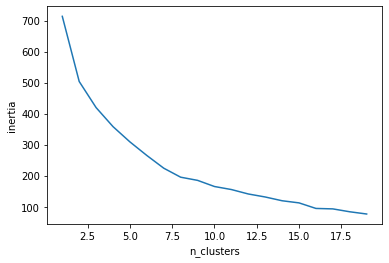

In [113]:
n_clusters = []
kmeans_inertia = []
for i in range(1,20,1):
    kmeans = KMeans(n_clusters=i,
                    random_state=42,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=20,
                   )
    n_clusters.append(i)
    kmeans.fit(transformed)
    x = kmeans.inertia_
    kmeans_inertia.append(x)

plt.plot(n_clusters,
         kmeans_inertia,
        )
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show

- Whilst the figure kind of shows 2 "elbows" (at n_clusters = ~2 and n_clusters = ~8), the cluster analysis will be executed with the elbow with the lowest inertia (n_clusters = 8):

In [114]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init=3, algorithm='elkan', max_iter=20)
kmeans.fit(transformed)

KMeans(algorithm='elkan', max_iter=20, n_init=3, random_state=42)

In [115]:
kmeans.inertia_

195.311555829899

In [116]:
clusters = kmeans.predict(transformed)
clusters

array([2, 1, 3, 7, 2, 3, 3, 3, 1, 3, 1, 4, 4, 2, 3, 1, 1, 4, 3, 3, 1, 2,
       2, 7, 2, 1, 3, 3, 3, 5, 2, 3, 3, 4, 1, 1, 6, 4, 0, 0, 0, 6],
      dtype=int32)

In [117]:
pd.Series(clusters).value_counts().sort_index()

0     3
1     9
2     7
3    13
4     5
5     1
6     2
7     2
dtype: int64

In [118]:
countries_var["cluster"] = clusters
countries_var.head()

,country_iso,gci_index,cp_index,fs_index,modslave_per_1000,vul_modslave,gov_response_modslave,mip_index,surface_area,population_1000,...,employed_industry,employed_services,unemployed,migrant_stock_1000,ref_ooc_1000,labour_part_f,labour_part_m,node_type,in_eu,cluster
1,ALB,4.184991,39.0,61.2,6.870872,45.200895,59.880952,43.0,28748,2930.0,...,18.3,40.3,15.8,57.6,8.8,40.2,61.0,both,0,2
3,AUT,5.246649,75.0,27.5,1.738006,3.354883,63.095238,46.0,83871,8736.0,...,25.6,69.7,6.2,1492.4,166.4,54.6,65.8,destination,1,1
4,BLR,4.717060,40.0,73.9,10.877024,47.275634,40.119048,NaN,207600,9468.0,...,32.0,58.4,0.5,1082.9,7.9,54.0,67.8,both,0,3
5,BEL,5.225063,77.0,29.0,2.026892,13.054976,68.333333,69.0,30528,11429.0,...,21.2,77.6,8.3,1387.9,63.8,48.1,58.9,destination,1,7
6,BIH,3.868728,39.0,74.6,3.422194,46.356698,48.630952,NaN,51209,3507.0,...,30.4,51.7,25.4,34.8,157.6,34.3,57.5,both,0,2


In [119]:
countries_var[['country_iso', 'cluster']]

,country_iso,cluster
1,ALB,2
3,AUT,1
4,BLR,3
5,BEL,7
6,BIH,2
7,BGR,3
8,HRV,3
9,CZE,3
10,DNK,1
11,EST,3


#### Feature selection for optimal clusterization
##### MIP index included = better clusterization?
There are too many countries in clusters 1 and 3, in comparison to the other clusters. After researching the topic of migration for the countries for which there is no MIP index and reviewing the initial cluster analysis (where AZE, KAZ & GEO form a cluster and BIH & MNE are together in cluster 2), the missing values of the mpi_index are filled with the mean: 

In [120]:
mipi_mean = countries_var['mip_index'].mean()

In [121]:
countries_var['mip_index'] = countries_var['mip_index'].fillna(mipi_mean)

In [122]:
to_transform = countries_var.drop(countries_var.iloc[:, [0,19,20,21]], axis=1)

In [123]:
transformer = StandardScaler()
transformer_fit = transformer.fit(to_transform)
transformed = transformer_fit.transform(to_transform)

<function matplotlib.pyplot.show(close=None, block=None)>

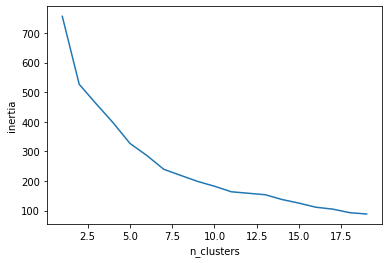

In [124]:
n_clusters = []
kmeans_inertia = []
for i in range(1,20,1):
    kmeans = KMeans(n_clusters=i,
                    random_state=42,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=20,
                   )
    n_clusters.append(i)
    kmeans.fit(transformed)
    x = kmeans.inertia_
    kmeans_inertia.append(x)

plt.plot(n_clusters,
         kmeans_inertia,
        )
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show

- n_clusters = 5 and n_clusters = 7 will be used to execute the following cluster analysis:

In [125]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=3, algorithm='elkan', max_iter=20)
kmeans.fit(transformed)

KMeans(algorithm='elkan', max_iter=20, n_clusters=5, n_init=3, random_state=42)

In [126]:
kmeans.inertia_

327.18673576416086

In [127]:
clusters = kmeans.predict(transformed)
clusters

array([3, 1, 0, 1, 3, 2, 2, 2, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2, 1, 3,
       3, 1, 3, 1, 2, 1, 3, 4, 3, 2, 2, 1, 1, 1, 0, 1, 0, 0, 3, 0],
      dtype=int32)

In [128]:
pd.Series(clusters).value_counts().sort_index()

0     5
1    16
2    11
3     9
4     1
dtype: int64

In [129]:
countries_var["cluster"] = clusters
countries_var.head()

,country_iso,gci_index,cp_index,fs_index,modslave_per_1000,vul_modslave,gov_response_modslave,mip_index,surface_area,population_1000,...,employed_industry,employed_services,unemployed,migrant_stock_1000,ref_ooc_1000,labour_part_f,labour_part_m,node_type,in_eu,cluster
1,ALB,4.184991,39.0,61.2,6.870872,45.200895,59.880952,43.000000,28748,2930.0,...,18.3,40.3,15.8,57.6,8.8,40.2,61.0,both,0,3
3,AUT,5.246649,75.0,27.5,1.738006,3.354883,63.095238,46.000000,83871,8736.0,...,25.6,69.7,6.2,1492.4,166.4,54.6,65.8,destination,1,1
4,BLR,4.717060,40.0,73.9,10.877024,47.275634,40.119048,52.361111,207600,9468.0,...,32.0,58.4,0.5,1082.9,7.9,54.0,67.8,both,0,0
5,BEL,5.225063,77.0,29.0,2.026892,13.054976,68.333333,69.000000,30528,11429.0,...,21.2,77.6,8.3,1387.9,63.8,48.1,58.9,destination,1,1
6,BIH,3.868728,39.0,74.6,3.422194,46.356698,48.630952,52.361111,51209,3507.0,...,30.4,51.7,25.4,34.8,157.6,34.3,57.5,both,0,3


In [130]:
countries_var[['country_iso', 'cluster']]

,country_iso,cluster
1,ALB,3
3,AUT,1
4,BLR,0
5,BEL,1
6,BIH,3
7,BGR,2
8,HRV,2
9,CZE,2
10,DNK,1
11,EST,2


##### Country statistics excluded = better clusterization?
Again, there are too many countries in two clusters (now in clusters 1 and 2 (besides the lower inertia, this is also the case with n_clusters = 7)). Because the measurement of some countries' indices already takes into account certain countries' statistics, the hypothesis is that using only the indices may yield better results:

In [131]:
to_transform = countries_var.drop(countries_var.iloc[:, [0,8,9,10,11,12,13,14,15,16,17,18,19,20,21]], axis=1)

In [132]:
to_transform.head()

,gci_index,cp_index,fs_index,modslave_per_1000,vul_modslave,gov_response_modslave,mip_index
1,4.184991,39.0,61.2,6.870872,45.200895,59.880952,43.000000
3,5.246649,75.0,27.5,1.738006,3.354883,63.095238,46.000000
4,4.717060,40.0,73.9,10.877024,47.275634,40.119048,52.361111
5,5.225063,77.0,29.0,2.026892,13.054976,68.333333,69.000000
6,3.868728,39.0,74.6,3.422194,46.356698,48.630952,52.361111


In [133]:
transformer = StandardScaler()
transformer_fit = transformer.fit(to_transform)
transformed = transformer_fit.transform(to_transform)

<function matplotlib.pyplot.show(close=None, block=None)>

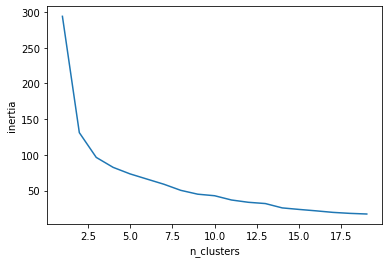

In [134]:
n_clusters = []
kmeans_inertia = []
for i in range(1,20,1):
    kmeans = KMeans(n_clusters=i,
                    random_state=42,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=20,
                   )
    n_clusters.append(i)
    kmeans.fit(transformed)
    x = kmeans.inertia_
    kmeans_inertia.append(x)

plt.plot(n_clusters,
         kmeans_inertia,
        )
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show

- n_clusters = 4 will be used to execute the following cluster analysis:

In [135]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=3, algorithm='elkan', max_iter=20)
kmeans.fit(transformed)

KMeans(algorithm='elkan', max_iter=20, n_clusters=4, n_init=3, random_state=42)

In [136]:
kmeans.inertia_

82.48977233520273

In [137]:
clusters = kmeans.predict(transformed)
clusters

array([3, 1, 0, 1, 3, 3, 3, 2, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2, 1, 3,
       3, 1, 3, 1, 2, 1, 3, 0, 3, 2, 2, 2, 1, 1, 3, 1, 3, 0, 3, 3],
      dtype=int32)

In [138]:
pd.Series(clusters).value_counts().sort_index()

0     3
1    15
2    10
3    14
dtype: int64

In [139]:
countries_var["cluster"] = clusters
countries_var.head()

,country_iso,gci_index,cp_index,fs_index,modslave_per_1000,vul_modslave,gov_response_modslave,mip_index,surface_area,population_1000,...,employed_industry,employed_services,unemployed,migrant_stock_1000,ref_ooc_1000,labour_part_f,labour_part_m,node_type,in_eu,cluster
1,ALB,4.184991,39.0,61.2,6.870872,45.200895,59.880952,43.000000,28748,2930.0,...,18.3,40.3,15.8,57.6,8.8,40.2,61.0,both,0,3
3,AUT,5.246649,75.0,27.5,1.738006,3.354883,63.095238,46.000000,83871,8736.0,...,25.6,69.7,6.2,1492.4,166.4,54.6,65.8,destination,1,1
4,BLR,4.717060,40.0,73.9,10.877024,47.275634,40.119048,52.361111,207600,9468.0,...,32.0,58.4,0.5,1082.9,7.9,54.0,67.8,both,0,0
5,BEL,5.225063,77.0,29.0,2.026892,13.054976,68.333333,69.000000,30528,11429.0,...,21.2,77.6,8.3,1387.9,63.8,48.1,58.9,destination,1,1
6,BIH,3.868728,39.0,74.6,3.422194,46.356698,48.630952,52.361111,51209,3507.0,...,30.4,51.7,25.4,34.8,157.6,34.3,57.5,both,0,3


In [140]:
countries_var[['country_iso', 'cluster']]

,country_iso,cluster
1,ALB,3
3,AUT,1
4,BLR,0
5,BEL,1
6,BIH,3
7,BGR,3
8,HRV,3
9,CZE,2
10,DNK,1
11,EST,2


### Cluster Profiling 

- Making heatmaps to check distinguishing characteristics per cluster:

In [141]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-0.27258463, -1.32041947,  1.37511732,  1.40183909,  1.3584798 ,
        -2.47264374, -0.58669386],
       [ 1.15003022,  1.14204483, -1.06808067, -0.88713818, -1.10769281,
         0.47977884,  0.87660761],
       [-0.29392794, -0.06136286, -0.19217576, -0.22724853, -0.11082294,
         0.08125646, -0.50765422],
       [-0.96381571, -0.89684182,  0.98697255,  0.81243148,  0.97487015,
        -0.04223686, -0.45089216]])

In [142]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['gci_index', 'cp_index', 'fs_index', 'modslave_per_1000', 'vul_modslave', 'gov_response_modslave', 'mip_index'])

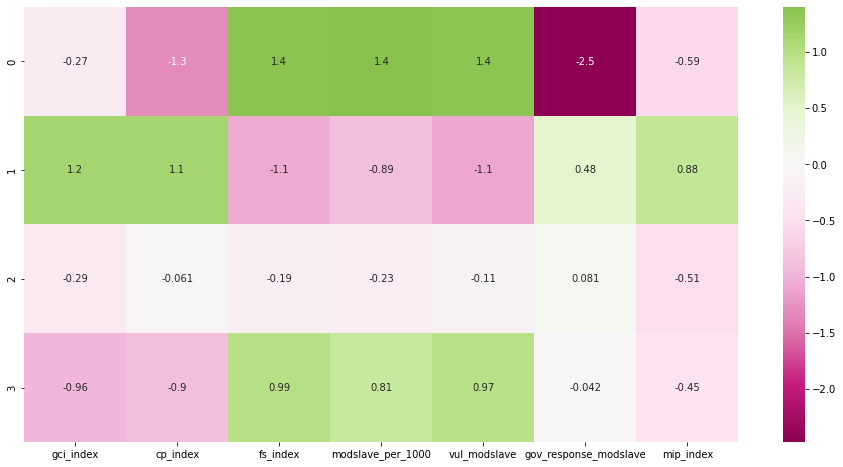

In [143]:
plt.figure(figsize=(16,8))
sns.heatmap(cluster_centers_df[['gci_index', 'cp_index', 'fs_index', 'modslave_per_1000', 'vul_modslave', 'gov_response_modslave', 'mip_index']], cmap="PiYG", annot=True, center=0)
plt.show()

In [144]:
sub_clusters_df = countries_var.drop(countries_var.iloc[:, [0,8,9,10,11,12,13,14,15,16,17,18,19,20]], axis=1)

In [145]:
sub_clusters_df = sub_clusters_df.groupby('cluster').mean()

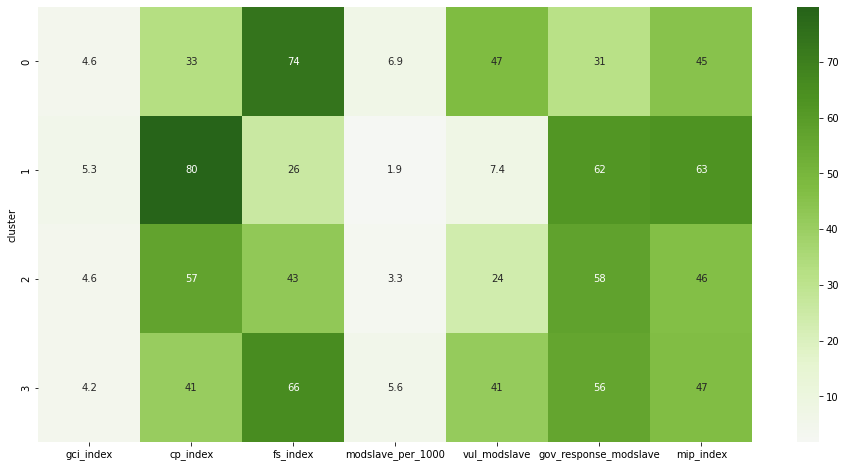

In [146]:
plt.figure(figsize=(16,8))
sns.heatmap(sub_clusters_df[['gci_index', 'cp_index', 'fs_index', 'modslave_per_1000', 'vul_modslave', 'gov_response_modslave', 'mip_index']], cmap="PiYG", annot=True, center=0)
plt.show()

### Cluster weights & clusters to lists
- cluster 0 weight 0.75
- cluster 3 weight 0.50
- cluster 2 weight 0.25
- cluster 1 weight 0.00

In [147]:
cluster_0 = []
cluster_3 = []
cluster_2 = []
cluster_1 = []
for i, j in zip(countries_var['cluster'], countries_var['country_iso']):
    if (i == 0) & (j not in cluster_0):
        cluster_0.append(j)
    elif (i == 3) & (j not in cluster_3):
        cluster_3.append(j)
    elif (i == 2) & (j not in cluster_2):
        cluster_2.append(j)
    elif (i == 1) & (j not in cluster_1):
        cluster_1.append(j)

In [148]:
cluster_1

['AUT',
 'BEL',
 'DNK',
 'FIN',
 'FRA',
 'DEU',
 'ISL',
 'IRL',
 'LUX',
 'NLD',
 'NOR',
 'PRT',
 'SWE',
 'CHE',
 'GBR']

## Route finder
### Countries & borders data

In [149]:
borders = pd.read_csv('/Users/elissadejong/UpRouted/data_files/country_borders_geodatasource.csv')

In [150]:
borders.head()

,country_code,country_name,country_border_code,country_border_name
0,AD,Andorra,FR,France
1,AD,Andorra,ES,Spain
2,AE,United Arab Emirates,OM,Oman
3,AE,United Arab Emirates,SA,Saudi Arabia
4,AF,Afghanistan,CN,China


- Conversion of iso-2 country codes to iso-3 country codes:

In [151]:
def convert_iso2_to_iso3(column):
    iso3 = []
    for i in column:
        try:
            iso3.append(iso.loc[iso['alpha-2'] == i]['alpha-3'].item())
        except: 
            iso3.append(i)
    return iso3

In [152]:
borders['country_code'] = convert_iso2_to_iso3(borders['country_code'])

In [153]:
borders['country_border_code'] = convert_iso2_to_iso3(borders['country_border_code'])

In [154]:
borders

,country_code,country_name,country_border_code,country_border_name
0,AND,Andorra,FRA,France
1,AND,Andorra,ESP,Spain
2,ARE,United Arab Emirates,OMN,Oman
3,ARE,United Arab Emirates,SAU,Saudi Arabia
4,AFG,Afghanistan,CHN,China
...,...,...,...,...
723,ZMB,Zambia,ZWE,Zimbabwe
724,ZWE,Zimbabwe,BWA,Botswana
725,ZWE,Zimbabwe,MOZ,Mozambique
726,ZWE,Zimbabwe,ZAF,South Africa


In [155]:
for i in borders['country_code']:
    if len(str(i)) < 3:
        print(i)

In [156]:
for i in borders['country_border_code']:
    if len(str(i)) < 3:
        print(i)

- "Europeanization" of the data:

In [157]:
borders_eur = borders[(borders['country_code'].isin(eur_iso_3)) & (borders['country_border_code'].isin(eur_iso_3))]

In [158]:
borders_eur.head()

,country_code,country_name,country_border_code,country_border_name
0,AND,Andorra,FRA,France
1,AND,Andorra,ESP,Spain
12,ALB,Albania,GRC,Greece
13,ALB,Albania,MNE,Montenegro
14,ALB,Albania,MKD,North Macedonia


### List of all routes (origin to destination)

In [159]:
routes = eur_ht.groupby(['citizenship', 'countryofexploitation']).size().reset_index()
routes

,citizenship,countryofexploitation,0
0,ALB,ALB,151
1,ALB,DEU,12
2,ALB,GRC,15
3,ALB,ITA,91
4,ALB,MKD,9
...,...,...,...
115,UKR,PRT,9
116,UKR,RUS,6997
117,UKR,SRB,58
118,UKR,TUR,437


In [160]:
routes.columns

Index(['citizenship', 'countryofexploitation', 0], dtype='object')

### Adding column 'route_type' to eur_ht
- As well, the national routes will be excluded from routes: 

In [161]:
def route_type(col1, col2):
    route_type = []
    for i, j in zip(col1, col2):
        if i == j:
            i = 'national'
            route_type.append(i)
        elif i != j:
            i = 'international'
            route_type.append(i)
    return route_type

In [162]:
eur_ht['route_type'] = route_type(eur_ht.citizenship, eur_ht.countryofexploitation)

In [163]:
eur_ht.head()

,yearofregistration,gender,agebroad,citizenship,countryofexploitation,meansofcontroldebtbondage,meansofcontroltakesearnings,meansofcontrolthreats,meansofcontrolpsychologicalabuse,meansofcontrolphysicalabuse,...,typeoflabourhospitality,typeoflabourother,typeofsexprostitution,typeofsexpornography,typeofsexother,recruiterrelationintimatepartner,recruiterrelationfriend,recruiterrelationfamily,recruiterrelationother,route_type
0,2015,M,30-38,UKR,RUS,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,international
1,2015,M,30-38,UKR,RUS,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,international
2,2015,M,30-38,UKR,RUS,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,international
3,2015,M,30-38,UKR,RUS,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,international
4,2015,M,30-38,UKR,RUS,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,international


In [164]:
routes = routes[routes['citizenship'] != routes['countryofexploitation']]

In [165]:
routes

,citizenship,countryofexploitation,0
1,ALB,DEU,12
2,ALB,GRC,15
3,ALB,ITA,91
4,ALB,MKD,9
5,ALB,SRB,17
...,...,...,...
114,UKR,POL,1641
115,UKR,PRT,9
116,UKR,RUS,6997
117,UKR,SRB,58


### Route finder
#### Several attempts through trial and a lot of errorrrrr
- Making an adjacency matrix and an adjacency list (border = 1, no border = 0):

In [166]:
matrix = pd.crosstab(borders_eur.country_code, borders_eur.country_border_code)
idx = matrix.columns.union(matrix.index)
matrix = matrix.reindex(index = idx, columns=idx, fill_value=0)
print (matrix)

     ALB  AND  AUT  AZE  BEL  BGR  BIH  BLR  CHE  CZE  ...  ROU  RUS  SMR  \
ALB    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
AND    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
AUT    0    0    0    0    0    0    0    0    1    1  ...    0    0    0   
AZE    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
BEL    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
BGR    0    0    0    0    0    0    0    0    0    0  ...    1    0    0   
BIH    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
BLR    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
CHE    0    0    1    0    0    0    0    0    0    0  ...    0    0    0   
CZE    0    0    1    0    0    0    0    0    0    0  ...    0    0    0   
DEU    0    0    1    0    1    0    0    0    1    1  ...    0    0    0   
DNK    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

In [167]:
matrix_df = pd.DataFrame(matrix)

In [168]:
matrix_df.head()

,ALB,AND,AUT,AZE,BEL,BGR,BIH,BLR,CHE,CZE,...,ROU,RUS,SMR,SRB,SVK,SVN,SWE,TUR,UKR,VAT
ALB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
AND,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AUT,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
AZE,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
BEL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
matrix_dict = pd.crosstab(borders_eur.country_code, borders_eur.country_border_code).to_dict()           

- Making a list with only the border combinations:

In [170]:
def remove_keys_with_0(nested_dict):
    if not hasattr(nested_dict, 'keys'):
        return nested_dict
    else:
        return {key: remove_keys_with_0(value) for key, value in nested_dict.items() if value is not 0}

In [171]:
borders_only = remove_keys_with_0(matrix_dict)

In [172]:
df = pd.json_normalize(borders_only, sep='_')

In [173]:
list_borders = df.columns.to_list()

#### Generating the route finder: same origin, same destination

- A generator? All possible permutations with minimum length = 1 (1 border crossing):

In [174]:
# all_possible_ways = (x for i in range(1, 5, 1) for x in itertools.permutations(list_borders, i) if (x[0].startswith('ALB')) & (x[-1].endswith('DEU')))

- Because of the immense ammount of permutations and being unable to implement more conditions in some way (destination of previous item = origin of next item, etc.) to narrow down this amount (so it could be conversed to a list size we can handle); a handcoded permutations loop?:  

In [175]:
# def filteredlist(p_list, p_start, visited): 
#     filtered_list = []
#     for x in p_list:
#         t_start= x.split('_')[0]
#         t_dest = x.split('_')[1]
#         if (t_start==p_start):
#             neighbours = list(x for x in p_list if (x.split('_')[0] == t_dest) & (x.split('_')[1] not in visited)) 
#             filtered_list.extend(neighbours)
#             visited.append(t_start)
#     return filtered_list, visited

# def permutation(lst, end_country, firsttime):
#     if len(lst) == 0:
#         return []
#     if len(lst) == 1 & firsttime==0:
#         return [lst]
#     l = [] 
#     for i in range(len(lst)):
#         m = lst[i]
#         remLst = filteredlist(list_borders, m, ['ALB'])
#         for p in permutation(remLst, end_country, 0):
#             if p.split('_')[1] not in visited:
#                 l.append([m] + p)
#             elif (p.split('_')[1] not in visited) & (p.split('_')[1]==end_country):
#                 return l
#     return(l)

 
 

- Python cannot handle the recursive loop?? ("max recursion depth exceeded"; if the limit is changed Python force quits)

In [176]:
# filteredlist(list_borders, 'ALB', ['ALB'])

### Connect to SQL for all permutations: Recursive Loops

- Refer to the .sql file for the code of the RunBorders procedure

In [177]:
borders_eur.to_csv(r'/Users/elissadejong/UpRouted/data_files/borders_eur_database.csv')

In [178]:
password = getpass.getpass()

········


In [179]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/UpRouted'

engine = create_engine(connection_string)

In [180]:
# engine.execute("CALL UpRouted.RunBorders('ALB','DEU', NULL, 8);")

In [181]:
# ALB_DEU = '''
# SELECT * FROM UpRouted.routes WHERE endsolution=1 
# ORDER BY length(routestring) ASC LIMIT 10;
# '''

# ALB_DEU_table = pd.read_sql_query(ALB_DEU, engine)
# ALB_DEU_table

- Making a function for calls and queries per origin & destination combination of the 108 international routes:

In [182]:
def route_finder(list):
    connection_string = 'mysql+pymysql://root:' + password + '@localhost/UpRouted'
    routes_dfs = []
    for i, j in zip(routes.citizenship, routes.countryofexploitation):
        engine = create_engine(connection_string)
        conn = engine.connect()
        conn.execute("CALL UpRouted.RunBorders('{i}','{j}', NULL, 7);".format(i=i, j=j))
        time.sleep(10)
        query = '''
        SELECT * FROM UpRouted.routes WHERE endsolution=1 
        ORDER BY length(routestring) ASC LIMIT 10;
        '''
        routes_dfs.append(pd.read_sql_query(query, conn))
        conn.close()
        engine.dispose()
    routes_df = pd.concat(routes_dfs)
    return routes_df

In [183]:
route_options = route_finder(routes)

In [184]:
route_options

,routeid,routestring,EndSolution
0,6829884,ALB_SRB_HUN_AUT_DEU,1
1,6824991,ALB_MNE_SRB_HUN_AUT_DEU,1
2,6830083,ALB_SRB_HUN_SVK_CZE_DEU,1
3,6829883,ALB_SRB_HUN_AUT_CZE_DEU,1
4,6829474,ALB_SRB_HRV_HUN_AUT_DEU,1
...,...,...,...
5,8495356,UKR_ROU_SRB_BGR_TUR,1
6,8481189,UKR_BLR_RUS_GEO_TUR,1
7,8492559,UKR_ROU_BGR_GRC_TUR,1
8,8481173,UKR_BLR_RUS_AZE_TUR,1


In [185]:
route_options['routestring'].value_counts()

UKR_HUN_AUT_ITA_FRA_ESP_PRT    1
ROU_MDA_UKR_POL_CZE            1
BLR_UKR_POL_DEU                1
UKR_HUN_HRV_BIH_SRB_ROU_MDA    1
BGR_ROU_HUN_AUT                1
                              ..
UKR_HUN_AUT_ITA                1
ROU_UKR_POL_DEU_DNK            1
BLR_POL_UKR_HUN_AUT            1
RUS_LTU_BLR_UKR                1
GEO_RUS_AZE_TUR                1
Name: routestring, Length: 961, dtype: int64

## Finding the route of the least resistance

### Split routestrings and add columns 'origin' and 'destination'

In [186]:
route_options.isna().sum()

routeid        0
routestring    0
EndSolution    0
dtype: int64

In [187]:
route_options_copy = route_options.copy()

In [188]:
route_options_copy['routestring'] = route_options_copy['routestring'].str.split('_', expand=False)

In [189]:
route_options_copy.head()

,routeid,routestring,EndSolution
0,6829884,"[ALB, SRB, HUN, AUT, DEU]",1
1,6824991,"[ALB, MNE, SRB, HUN, AUT, DEU]",1
2,6830083,"[ALB, SRB, HUN, SVK, CZE, DEU]",1
3,6829883,"[ALB, SRB, HUN, AUT, CZE, DEU]",1
4,6829474,"[ALB, SRB, HRV, HUN, AUT, DEU]",1


In [190]:
origin = []
destination = []
for i, j in enumerate(route_options_copy['routestring']):
    origin.append(j[0])
    destination.append(j[-1])

In [191]:
route_options_copy['origin'] = origin

In [192]:
route_options_copy['destination'] = destination

In [193]:
route_options_copy.head()

,routeid,routestring,EndSolution,origin,destination
0,6829884,"[ALB, SRB, HUN, AUT, DEU]",1,ALB,DEU
1,6824991,"[ALB, MNE, SRB, HUN, AUT, DEU]",1,ALB,DEU
2,6830083,"[ALB, SRB, HUN, SVK, CZE, DEU]",1,ALB,DEU
3,6829883,"[ALB, SRB, HUN, AUT, CZE, DEU]",1,ALB,DEU
4,6829474,"[ALB, SRB, HRV, HUN, AUT, DEU]",1,ALB,DEU


### Route calculator: EU/non-EU as 'border weights'
- In addition to the cluster weights
- cluster 0 weight 0.75
- cluster 3 weight 0.50
- cluster 2 weight 0.25
- cluster 1 weight 0.00
<br>
- EU weight +0.00
- non-EU weight +1.00:

In [194]:
route_weights = []
for i in route_options_copy['routestring']:
    route_weight = []
    for x in i:
        if (x in eu_list) & (x in cluster_0):
            route_weight.append('0.75')
        elif (x in eu_list) & (x in cluster_3):
            route_weight.append('0.50')
        elif (x in eu_list) & (x in cluster_2):
            route_weight.append('0.25')
        elif (x in eu_list) & (x in cluster_1):
            route_weight.append('0.00')
        elif (x not in eu_list) & (x in cluster_0):
            route_weight.append('1.75')
        elif (x not in eu_list) & (x in cluster_3):
            route_weight.append('1.50')
        elif (x not in eu_list) & (x in cluster_2):
            route_weight.append('1.25')
        elif (x not in eu_list) & (x in cluster_1):
            route_weight.append('1.00')
    route_weights.append(route_weight)

- Changing route_weights to integers:

In [195]:
route_weights_floats = []
for i in route_weights:
    i = [float(x) for x in i]
    route_weights_floats.append(i)

In [196]:
route_options_copy['weights'] = route_weights_floats

In [197]:
route_options_copy

,routeid,routestring,EndSolution,origin,destination,weights
0,6829884,"[ALB, SRB, HUN, AUT, DEU]",1,ALB,DEU,"[1.5, 1.5, 0.25, 0.0, 0.0]"
1,6824991,"[ALB, MNE, SRB, HUN, AUT, DEU]",1,ALB,DEU,"[1.5, 1.5, 1.5, 0.25, 0.0, 0.0]"
2,6830083,"[ALB, SRB, HUN, SVK, CZE, DEU]",1,ALB,DEU,"[1.5, 1.5, 0.25, 0.25, 0.25, 0.0]"
3,6829883,"[ALB, SRB, HUN, AUT, CZE, DEU]",1,ALB,DEU,"[1.5, 1.5, 0.25, 0.0, 0.25, 0.0]"
4,6829474,"[ALB, SRB, HRV, HUN, AUT, DEU]",1,ALB,DEU,"[1.5, 1.5, 0.5, 0.25, 0.0, 0.0]"
...,...,...,...,...,...,...
5,8495356,"[UKR, ROU, SRB, BGR, TUR]",1,UKR,TUR,"[1.5, 0.5, 1.5, 0.5, 1.5]"
6,8481189,"[UKR, BLR, RUS, GEO, TUR]",1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]"
7,8492559,"[UKR, ROU, BGR, GRC, TUR]",1,UKR,TUR,"[1.5, 0.5, 0.5, 0.5, 1.5]"
8,8481173,"[UKR, BLR, RUS, AZE, TUR]",1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]"


- Calculating weight per route:

In [198]:
weight_of_route = []
for i in route_options_copy['weights']:
    weight_of_route.append(sum(i))

In [199]:
route_options_copy['weight_of_route'] = weight_of_route

In [200]:
route_options_copy.head()

,routeid,routestring,EndSolution,origin,destination,weights,weight_of_route
0,6829884,"[ALB, SRB, HUN, AUT, DEU]",1,ALB,DEU,"[1.5, 1.5, 0.25, 0.0, 0.0]",3.25
1,6824991,"[ALB, MNE, SRB, HUN, AUT, DEU]",1,ALB,DEU,"[1.5, 1.5, 1.5, 0.25, 0.0, 0.0]",4.75
2,6830083,"[ALB, SRB, HUN, SVK, CZE, DEU]",1,ALB,DEU,"[1.5, 1.5, 0.25, 0.25, 0.25, 0.0]",3.75
3,6829883,"[ALB, SRB, HUN, AUT, CZE, DEU]",1,ALB,DEU,"[1.5, 1.5, 0.25, 0.0, 0.25, 0.0]",3.50
4,6829474,"[ALB, SRB, HRV, HUN, AUT, DEU]",1,ALB,DEU,"[1.5, 1.5, 0.5, 0.25, 0.0, 0.0]",3.75


In [201]:
route_options_copy['weight_of_route'].value_counts()

4.00     66
3.75     60
2.25     59
5.50     55
2.00     47
5.25     45
6.75     44
3.50     42
2.50     41
4.25     39
2.75     33
1.75     30
4.50     29
3.00     29
1.25     29
5.00     28
6.50     24
3.25     21
1.50     20
1.00     20
4.75     19
7.00     19
5.75     19
7.25     17
6.25     15
6.00     14
8.50     12
7.50     10
7.75     10
8.00     10
8.25      9
0.75      9
0.50      9
9.00      5
0.25      5
8.75      5
9.25      5
10.50     3
9.50      2
12.00     2
10.25     1
Name: weight_of_route, dtype: int64

- Groupby 'origin' & 'destination' and selecting the route of the least resistance per route_flow:

In [202]:
route_options_copy['route_flow'] = route_options_copy['origin'] + route_options_copy['destination']

In [203]:
min_weight_route = route_options_copy.sort_values(['weight_of_route']).groupby(['route_flow']).head(1)

In [204]:
min_weight_route

,routeid,routestring,EndSolution,origin,destination,weights,weight_of_route,route_flow
4,7337870,"[HUN, AUT, DEU, BEL, NLD]",1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD
0,7302215,"[HUN, AUT, DEU]",1,HUN,DEU,"[0.25, 0.0, 0.0]",0.25,HUNDEU
0,7489876,"[PRT, ESP]",1,PRT,ESP,"[0.0, 0.25]",0.25,PRTESP
0,7489875,"[POL, DEU]",1,POL,DEU,"[0.25, 0.0]",0.25,POLDEU
1,7576777,"[ROU, HUN, AUT, DEU]",1,ROU,DEU,"[0.5, 0.25, 0.0, 0.0]",0.75,ROUDEU
...,...,...,...,...,...,...,...,...
0,7222842,"[BLR, UKR, ROU, BGR, MKD]",1,BLR,MKD,"[1.75, 1.5, 0.5, 0.5, 1.5]",5.75,BLRMKD
4,8084930,"[RUS, UKR, ROU, BGR, MKD]",1,RUS,MKD,"[1.75, 1.5, 0.5, 0.5, 1.5]",5.75,RUSMKD
0,7367318,"[KAZ, RUS, AZE, TUR]",1,KAZ,TUR,"[1.75, 1.75, 1.5, 1.5]",6.50,KAZTUR
0,7367315,"[KAZ, RUS, UKR, MDA]",1,KAZ,MDA,"[1.75, 1.75, 1.5, 1.5]",6.50,KAZMDA


- The 4 missing routes from the 108 routes:

In [205]:
routes.loc[routes['countryofexploitation'] == 'GBR']

,citizenship,countryofexploitation,0
39,HUN,GBR,10
69,ROU,GBR,9
97,SVK,GBR,72


In [206]:
routes.loc[routes['countryofexploitation'] == 'IRL']

,citizenship,countryofexploitation,0
71,ROU,IRL,33


## Export of dataframes for Tableau

In [207]:
eur_ht.to_csv(r'/Users/elissadejong/UpRouted/data_files/export_SQL_tableau/eur_human_trafficking.csv')

In [208]:
countries_var.to_csv(r'/Users/elissadejong/UpRouted/data_files/export_SQL_tableau/eur_countries_variables.csv')

In [209]:
route_options_copy.to_csv(r'/Users/elissadejong/UpRouted/data_files/export_SQL_tableau/eur_routes.csv')

### Generating a column 'order' for mapping routes of least resistance in Tableau
- Making each list item of column 'routestring' a separate row:

In [210]:
exploded = min_weight_route.explode('routestring')

In [211]:
exploded

,routeid,routestring,EndSolution,origin,destination,weights,weight_of_route,route_flow
4,7337870,HUN,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD
4,7337870,AUT,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD
4,7337870,DEU,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD
4,7337870,BEL,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD
4,7337870,NLD,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD
...,...,...,...,...,...,...,...,...
0,7367315,MDA,1,KAZ,MDA,"[1.75, 1.75, 1.5, 1.5]",6.50,KAZMDA
0,7250092,BLR,1,BLR,TUR,"[1.75, 1.75, 1.5, 1.5]",6.50,BLRTUR
0,7250092,RUS,1,BLR,TUR,"[1.75, 1.75, 1.5, 1.5]",6.50,BLRTUR
0,7250092,AZE,1,BLR,TUR,"[1.75, 1.75, 1.5, 1.5]",6.50,BLRTUR


- Adding the column 'order' through cumulative count of rows per distinct route_flow:

In [212]:
exploded['order'] = exploded.groupby('route_flow').cumcount()+1

In [213]:
exploded

,routeid,routestring,EndSolution,origin,destination,weights,weight_of_route,route_flow,order
4,7337870,HUN,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD,1
4,7337870,AUT,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD,2
4,7337870,DEU,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD,3
4,7337870,BEL,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD,4
4,7337870,NLD,1,HUN,NLD,"[0.25, 0.0, 0.0, 0.0, 0.0]",0.25,HUNNLD,5
...,...,...,...,...,...,...,...,...,...
0,7367315,MDA,1,KAZ,MDA,"[1.75, 1.75, 1.5, 1.5]",6.50,KAZMDA,4
0,7250092,BLR,1,BLR,TUR,"[1.75, 1.75, 1.5, 1.5]",6.50,BLRTUR,1
0,7250092,RUS,1,BLR,TUR,"[1.75, 1.75, 1.5, 1.5]",6.50,BLRTUR,2
0,7250092,AZE,1,BLR,TUR,"[1.75, 1.75, 1.5, 1.5]",6.50,BLRTUR,3


- Dropping the columns which will be of no use:

In [214]:
routes_tableau = exploded.drop(['EndSolution', 'origin', 'destination', 'weights'], axis = 1)

In [215]:
routes_tableau.to_csv(r'/Users/elissadejong/UpRouted/data_files/export_SQL_tableau/routes_tableau.csv')

### Generating a seperate routes dataframe for example 'BLR' in Tableau

In [216]:
blr_routes = []
for i in route_options_copy['routestring']:
    for x in i:
        if x == 'BLR':
            blr_routes.append(i)

In [217]:
blr_routes

[['AZE', 'RUS', 'BLR', 'UKR', 'ROU', 'BGR', 'TUR'],
 ['BGR', 'ROU', 'UKR', 'BLR', 'POL'],
 ['BGR', 'ROU', 'UKR', 'BLR', 'RUS', 'FIN', 'SWE'],
 ['BGR', 'ROU', 'UKR', 'BLR', 'RUS', 'NOR', 'SWE'],
 ['BLR', 'UKR', 'SVK', 'AUT'],
 ['BLR', 'POL', 'DEU', 'AUT'],
 ['BLR', 'POL', 'CZE', 'AUT'],
 ['BLR', 'POL', 'SVK', 'AUT'],
 ['BLR', 'UKR', 'HUN', 'AUT'],
 ['BLR', 'POL', 'UKR', 'HUN', 'AUT'],
 ['BLR', 'LTU', 'POL', 'DEU', 'AUT'],
 ['BLR', 'LTU', 'POL', 'SVK', 'AUT'],
 ['BLR', 'POL', 'UKR', 'SVK', 'AUT'],
 ['BLR', 'RUS', 'POL', 'DEU', 'AUT'],
 ['BLR', 'POL', 'CZE'],
 ['BLR', 'UKR', 'POL', 'CZE'],
 ['BLR', 'RUS', 'POL', 'CZE'],
 ['BLR', 'UKR', 'SVK', 'CZE'],
 ['BLR', 'LTU', 'POL', 'CZE'],
 ['BLR', 'LTU', 'RUS', 'POL', 'CZE'],
 ['BLR', 'RUS', 'UKR', 'POL', 'CZE'],
 ['BLR', 'LVA', 'RUS', 'POL', 'CZE'],
 ['BLR', 'RUS', 'LTU', 'POL', 'CZE'],
 ['BLR', 'RUS', 'UKR', 'SVK', 'CZE'],
 ['BLR', 'POL', 'DEU'],
 ['BLR', 'LTU', 'POL', 'DEU'],
 ['BLR', 'POL', 'CZE', 'DEU'],
 ['BLR', 'UKR', 'POL', 'DEU'],
 ['BLR

In [221]:
filtered_blr = route_options_copy[(route_options_copy['routestring'].isin(blr_routes))]

In [222]:
filtered_blr.head()

,routeid,routestring,EndSolution,origin,destination,weights,weight_of_route,route_flow
5,6865894,"[AZE, RUS, BLR, UKR, ROU, BGR, TUR]",1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR
6,7057608,"[BGR, ROU, UKR, BLR, POL]",1,BGR,POL,"[0.5, 0.5, 1.5, 1.75, 0.25]",4.5,BGRPOL
6,7110399,"[BGR, ROU, UKR, BLR, RUS, FIN, SWE]",1,BGR,SWE,"[0.5, 0.5, 1.5, 1.75, 1.75, 0.0, 0.0]",6.0,BGRSWE
8,7110421,"[BGR, ROU, UKR, BLR, RUS, NOR, SWE]",1,BGR,SWE,"[0.5, 0.5, 1.5, 1.75, 1.75, 1.0, 0.0]",7.0,BGRSWE
0,7155869,"[BLR, UKR, SVK, AUT]",1,BLR,AUT,"[1.75, 1.5, 0.25, 0.0]",3.5,BLRAUT


### Generating a column 'order' for mapping routes of least resistance in Tableau
- Making each list item of column 'routestring' a separate row:

In [223]:
exploded_blr = filtered_blr.explode('routestring')

In [224]:
exploded_blr

,routeid,routestring,EndSolution,origin,destination,weights,weight_of_route,route_flow
5,6865894,AZE,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR
5,6865894,RUS,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR
5,6865894,BLR,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR
5,6865894,UKR,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR
5,6865894,ROU,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR
...,...,...,...,...,...,...,...,...
8,8481173,UKR,1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]",8.0,UKRTUR
8,8481173,BLR,1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]",8.0,UKRTUR
8,8481173,RUS,1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]",8.0,UKRTUR
8,8481173,AZE,1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]",8.0,UKRTUR


- Adding the column 'order' through cumulative count of rows per distinct route_flow:

In [225]:
exploded_blr['order'] = exploded_blr.groupby('routeid').cumcount()+1

In [226]:
exploded_blr

,routeid,routestring,EndSolution,origin,destination,weights,weight_of_route,route_flow,order
5,6865894,AZE,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR,1
5,6865894,RUS,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR,2
5,6865894,BLR,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR,3
5,6865894,UKR,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR,4
5,6865894,ROU,1,AZE,TUR,"[1.5, 1.75, 1.75, 1.5, 0.5, 0.5, 1.5]",9.0,AZETUR,5
...,...,...,...,...,...,...,...,...,...
8,8481173,UKR,1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]",8.0,UKRTUR,1
8,8481173,BLR,1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]",8.0,UKRTUR,2
8,8481173,RUS,1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]",8.0,UKRTUR,3
8,8481173,AZE,1,UKR,TUR,"[1.5, 1.75, 1.75, 1.5, 1.5]",8.0,UKRTUR,4


- Dropping the columns which will be of no use:

In [227]:
blr_tableau = exploded_blr.drop(['EndSolution', 'origin', 'destination', 'weights'], axis = 1)

In [228]:
blr_tableau.to_csv(r'/Users/elissadejong/UpRouted/data_files/export_SQL_tableau/blr_tableau.csv')

### Dataframe busiest route combinations citizenship & country of exploitation

In [231]:
busiest_routes = routes.sort_values([0], ascending=False).head(10)

In [232]:
busiest_routes

,citizenship,countryofexploitation,0
116,UKR,RUS,6997
114,UKR,POL,1641
34,BLR,RUS,1314
118,UKR,TUR,437
55,MDA,UKR,345
62,ROU,BIH,277
53,MDA,SRB,274
73,ROU,MKD,264
54,MDA,TUR,249
72,ROU,ITA,229
